In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Python for Data Analytics/Module Task"

/content/drive/MyDrive/Python for Data Analytics/Module Task


In [5]:
import pandas as pd

events = pd.read_csv('events.csv')
products = pd.read_csv('products.csv')
countries = pd.read_csv('countries.csv')

display(events.head())
display(products.head())
display(countries.head())

events.info()
products.info()
countries.info()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
mem

In [8]:
events['Order Date'] = pd.to_datetime(events['Order Date'])
events['Ship Date'] = pd.to_datetime(events['Ship Date'])

events['Total Revenue'] = events['Units Sold'] * events['Unit Price']
events['Total Cost'] = events['Units Sold'] * events['Unit Cost']
events['Profit'] = events['Total Revenue'] - events['Total Cost']

events.head()


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Profit
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68


In [10]:
events_full = events.merge(
    products,
    how='left',
    left_on='Product ID',
    right_on='id'
)

events_full = events_full.merge(
    countries,
    how='left',
    left_on='Country Code',
    right_on='alpha-3'
)

display(events_full.head())
print("\nData frame columns:")
print(events_full.columns.tolist())

print("\nNumber of omissions per column:")
print(events_full.isna().sum())


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Profit,id,item_type,name,alpha-2,alpha-3,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,133705.00,76121.50,57583.50,2103,Cereal,Norway,NO,NOR,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,409960.10,233400.23,176559.87,2103,Cereal,Serbia,RS,SRB,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,NaN,7940,Online,4693.0,668.27,502.54,3136191.11,2358420.22,777770.89,7940,Household,NaN,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,127966.88,41968.64,85998.24,2455,Clothes,Montenegro,ME,MNE,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,362897.60,243129.92,119767.68,1270,Beverages,Serbia,RS,SRB,Europe,Southern Europe



Data frame columns:
['Order ID', 'Order Date', 'Ship Date', 'Order Priority', 'Country Code', 'Product ID', 'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Profit', 'id', 'item_type', 'name', 'alpha-2', 'alpha-3', 'region', 'sub-region']

Number of omissions per column:
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
Total Revenue      2
Total Cost         2
Profit             2
id                 0
item_type          0
name              82
alpha-2           82
alpha-3           82
region            82
sub-region        82
dtype: int64


In [11]:
events_full.isna().sum().sort_values(ascending=False)


,0
sub-region,82
region,82
alpha-3,82
Country Code,82
alpha-2,82
name,82
Total Revenue,2
Units Sold,2
Total Cost,2
Profit,2


In [12]:
events_clean = events_full.dropna(subset=['name', 'region', 'sub-region'])
events_clean.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,0
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [13]:
duplicates = events_clean.duplicated().sum()
duplicates


np.int64(0)

In [14]:
events_clean.dtypes

,0
Order ID,int64
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Order Priority,object
Country Code,object
Product ID,int64
Sales Channel,object
Units Sold,float64
Unit Price,float64
Unit Cost,float64


In [16]:
total_orders = events_clean['Order ID'].nunique()
total_revenue = events_clean['Total Revenue'].sum()
total_cost = events_clean['Total Cost'].sum()
total_profit = events_clean['Profit'].sum()
total_countries = events_clean['name'].nunique()
total_products = events_clean['item_type'].nunique()

metrics = {
    'Total Orders': total_orders,
    'Total Revenue': total_revenue,
    'Total Cost': total_cost,
    'Total Profit': total_profit,
    'Countries Covered': total_countries,
    'Product Categories': total_products
}

metrics


{'Total Orders': 1248,
 'Total Revenue': np.float64(1598983761.2600002),
 'Total Cost': np.float64(1125274726.2),
 'Total Profit': np.float64(473709035.05999994),
 'Countries Covered': 45,
 'Product Categories': 12}

In [17]:
import matplotlib.pyplot as plt

product_stats = events_clean.groupby('item_type').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum'
}).sort_values('Total Revenue', ascending=False)

product_stats


,Units Sold,Total Revenue,Total Cost,Profit
item_type,,,,
Office Supplies,581481.0,3.786662e+08,3.052543e+08,73411976.25
Household,417308.0,2.788744e+08,2.097140e+08,69160454.84
Cosmetics,506188.0,2.213054e+08,1.332945e+08,88010907.56
Meat,477233.0,2.013398e+08,1.740421e+08,27297727.60
Baby Food,524265.0,1.338344e+08,8.357833e+07,50256042.90
Cereal,460266.0,9.467672e+07,5.390175e+07,40774964.94
Vegetables,532510.0,8.203849e+07,4.842113e+07,33617356.30
Snacks,453621.0,6.921349e+07,4.420083e+07,25012661.94
Clothes,579313.0,6.330732e+07,2.076258e+07,42544746.72


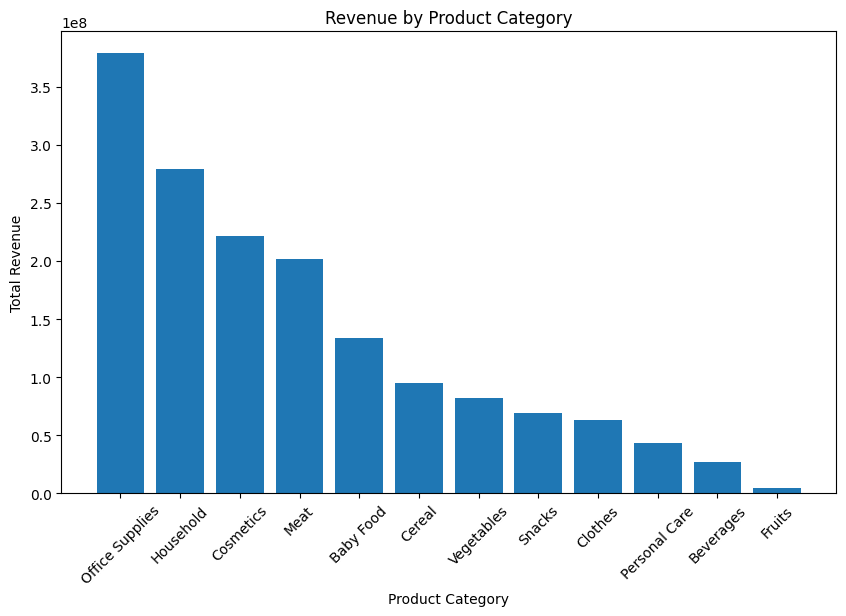

In [18]:
plt.figure(figsize=(10,6))
plt.bar(product_stats.index, product_stats['Total Revenue'])
plt.xticks(rotation=45)
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

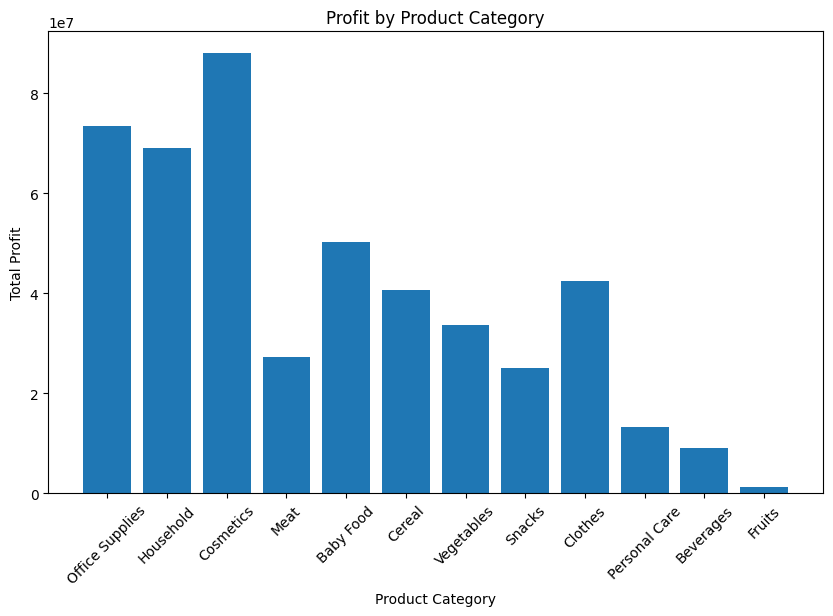

In [19]:
plt.figure(figsize=(10,6))
plt.bar(product_stats.index, product_stats['Profit'])
plt.xticks(rotation=45)
plt.title("Profit by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.show()


In [20]:
country_stats = events_clean.groupby('name').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum'
}).sort_values('Total Revenue', ascending=False)

country_stats.head(10)


,Units Sold,Total Revenue,Total Cost,Profit
name,,,,
Czech Republic,142446.0,53543932.14,39908338.36,13635593.78
Ukraine,164577.0,53252317.54,38447391.80,14804925.74
Bosnia and Herzegovina,153545.0,50117508.49,36859905.72,13257602.77
Macedonia,203078.0,49222085.25,35537985.30,13684099.95
San Marino,192228.0,47883708.48,34090715.67,13792992.81
Andorra,185686.0,47756693.17,32346656.54,15410036.63
Portugal,124825.0,47172189.84,35826782.25,11345407.59
Malta,173641.0,47145320.81,32535192.93,14610127.88
Russia,165954.0,46051659.81,32783977.17,13267682.64


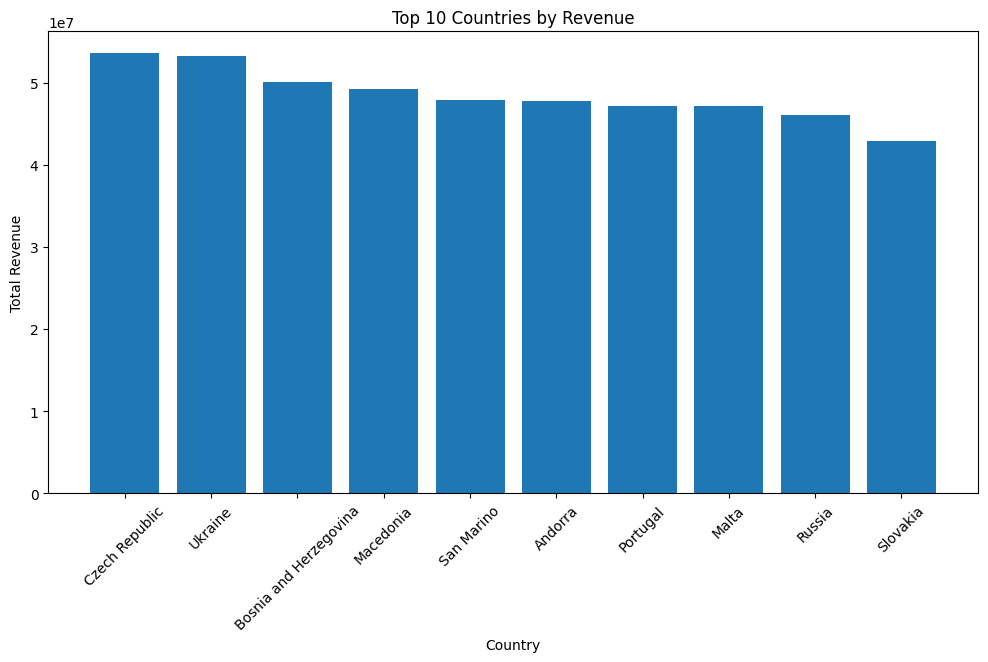

In [21]:
top10_countries = country_stats.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10_countries.index, top10_countries['Total Revenue'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.show()


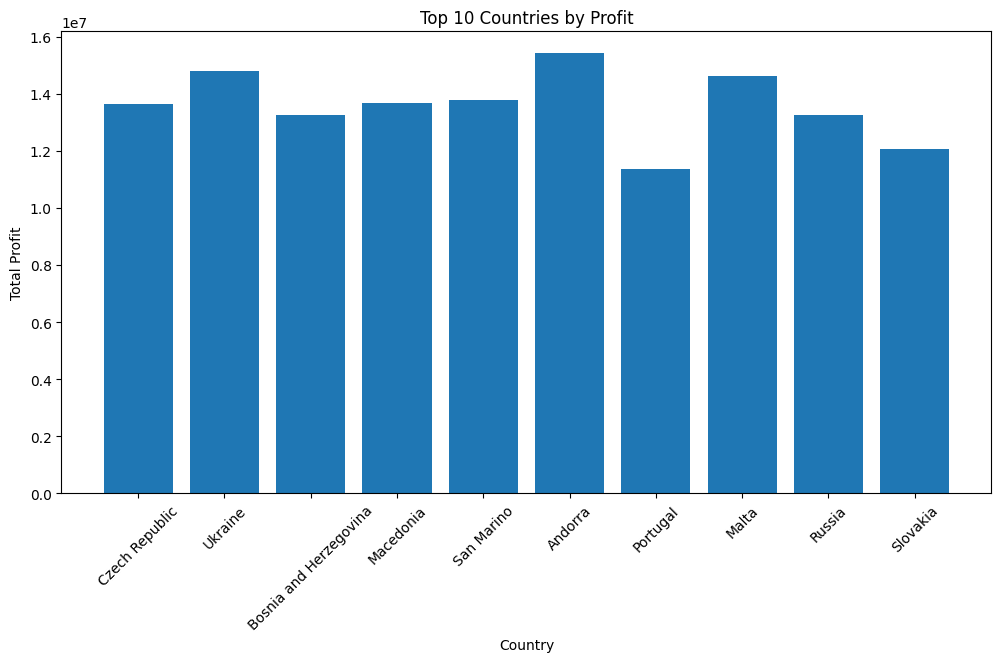

In [22]:
plt.figure(figsize=(12,6))
plt.bar(top10_countries.index, top10_countries['Profit'])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Profit")
plt.xlabel("Country")
plt.ylabel("Total Profit")
plt.show()


In [23]:
region_stats = events_clean.groupby('region').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum'
}).sort_values('Total Revenue', ascending=False)

region_stats


,Units Sold,Total Revenue,Total Cost,Profit
region,,,,
Europe,5761244.0,1.505653e+09,1.057096e+09,4.485568e+08
Asia,410427.0,9.333089e+07,6.817863e+07,2.515225e+07


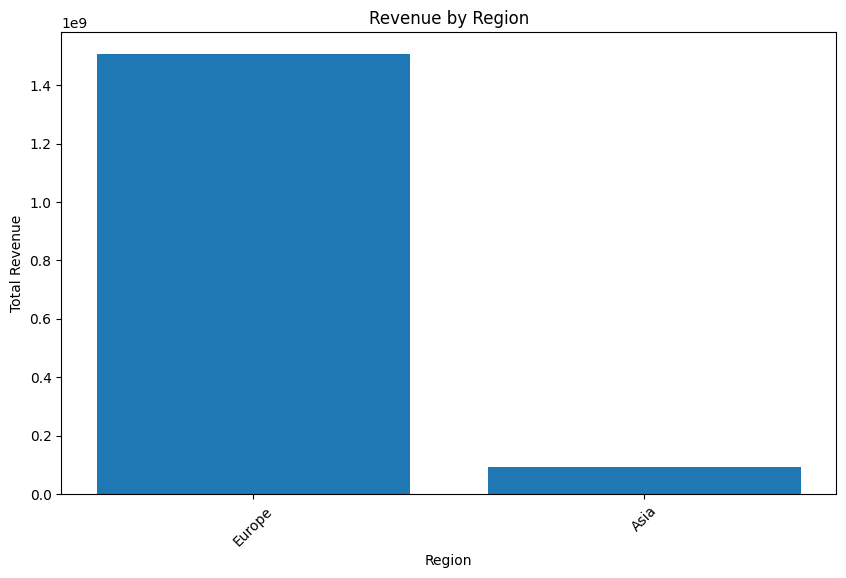

In [24]:
plt.figure(figsize=(10,6))
plt.bar(region_stats.index, region_stats['Total Revenue'])
plt.xticks(rotation=45)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

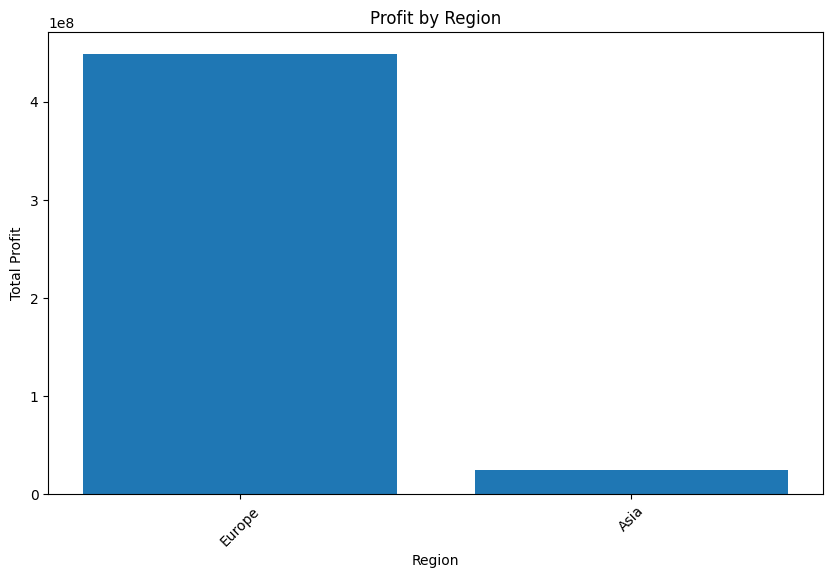

In [25]:
plt.figure(figsize=(10,6))
plt.bar(region_stats.index, region_stats['Profit'])
plt.xticks(rotation=45)
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()


In [26]:
channel_stats = events_clean.groupby('Sales Channel').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Total Cost': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'}).sort_values('Total Revenue', ascending=False)

channel_stats


,Units Sold,Total Revenue,Total Cost,Profit,Orders
Sales Channel,,,,,
Offline,3113412.0,8.100305e+08,5.715191e+08,2.385113e+08,623
Online,3045334.0,7.833738e+08,5.493462e+08,2.340276e+08,622
online,12925.0,5.579514e+06,4.409421e+06,1.170094e+06,3


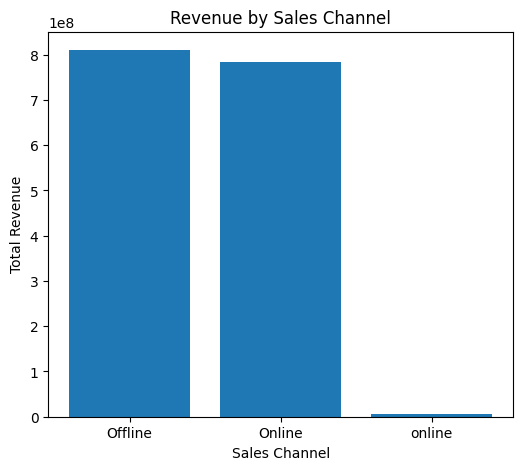

In [27]:
plt.figure(figsize=(6,5))
plt.bar(channel_stats.index, channel_stats['Total Revenue'])
plt.title("Revenue by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue")
plt.show()


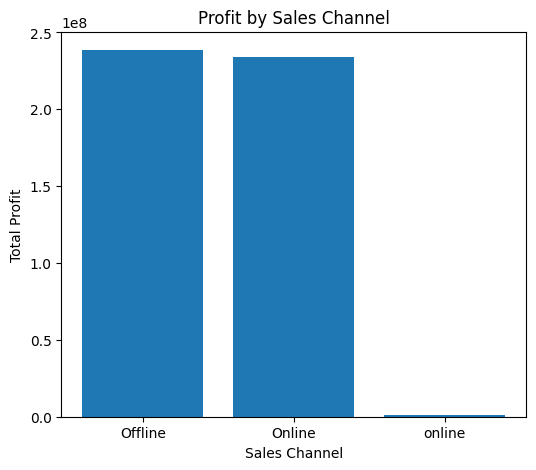

In [28]:
plt.figure(figsize=(6,5))
plt.bar(channel_stats.index, channel_stats['Profit'])
plt.title("Profit by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Profit")
plt.show()

In [29]:
events_clean['Shipping_Time'] = (events_clean['Ship Date'] - events_clean['Order Date']).dt.days
events_clean[['Order Date', 'Ship Date', 'Shipping_Time']].head()

/tmp/ipython-input-3094519473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_clean['Shipping_Time'] = (events_clean['Ship Date'] - events_clean['Order Date']).dt.days


,Order Date,Ship Date,Shipping_Time
0,2014-10-08,2014-10-18,10
1,2016-08-11,2016-08-11,0
3,2017-05-13,2017-06-13,31
4,2012-08-11,2012-09-18,38
5,2015-03-15,2015-04-18,34


In [30]:
shipping_by_item = events_clean.groupby('item_type')['Shipping_Time'].mean().sort_values()
shipping_by_item

,Shipping_Time
item_type,
Personal Care,20.403670
Clothes,23.539216
Household,23.571429
Beverages,23.946903
Vegetables,24.438095
Fruits,24.475728
Snacks,25.263158
Meat,25.669903
Cosmetics,25.879630


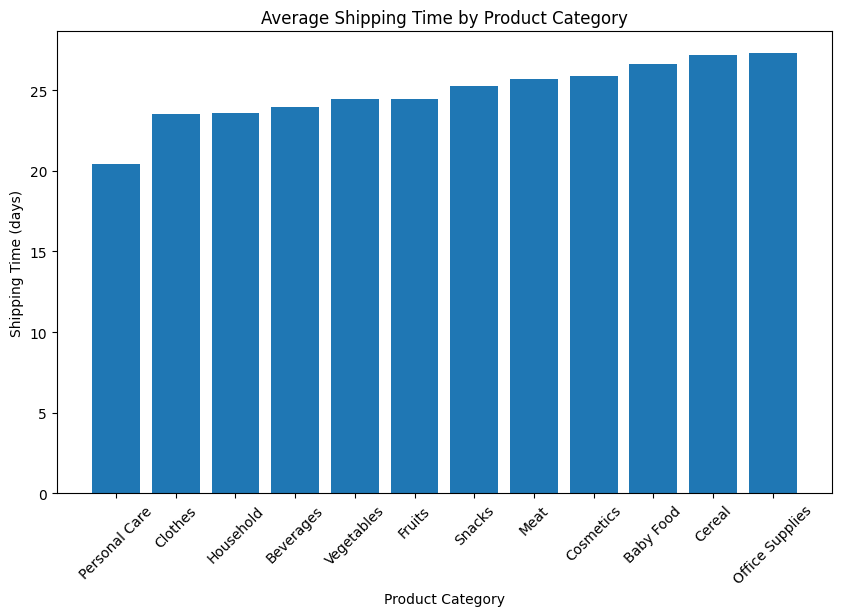

In [31]:
plt.figure(figsize=(10,6))
plt.bar(shipping_by_item.index, shipping_by_item)
plt.xticks(rotation=45)
plt.title("Average Shipping Time by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Shipping Time (days)")
plt.show()

In [32]:
shipping_by_country = events_clean.groupby('name')['Shipping_Time'].mean().sort_values()
shipping_by_country.head(10)

,Shipping_Time
name,
Croatia,18.222222
United Kingdom,18.391304
Denmark,19.692308
Estonia,20.521739
Serbia,20.586207
Latvia,20.888889
Malta,21.562500
San Marino,21.700000
Liechtenstein,22.958333


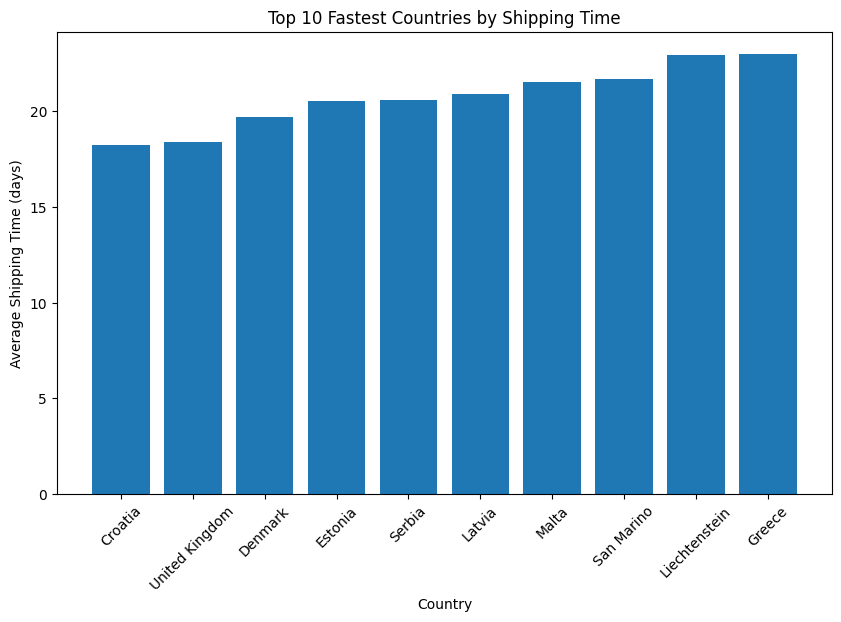

In [33]:
top10_fast = shipping_by_country.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_fast.index, top10_fast)
plt.xticks(rotation=45)
plt.title("Top 10 Fastest Countries by Shipping Time")
plt.xlabel("Country")
plt.ylabel("Average Shipping Time (days)")
plt.show()

In [35]:
shipping_by_region = events_clean.groupby('region')['Shipping_Time'].mean().sort_values()
shipping_by_region

,Shipping_Time
region,
Europe,24.777873
Asia,26.085366


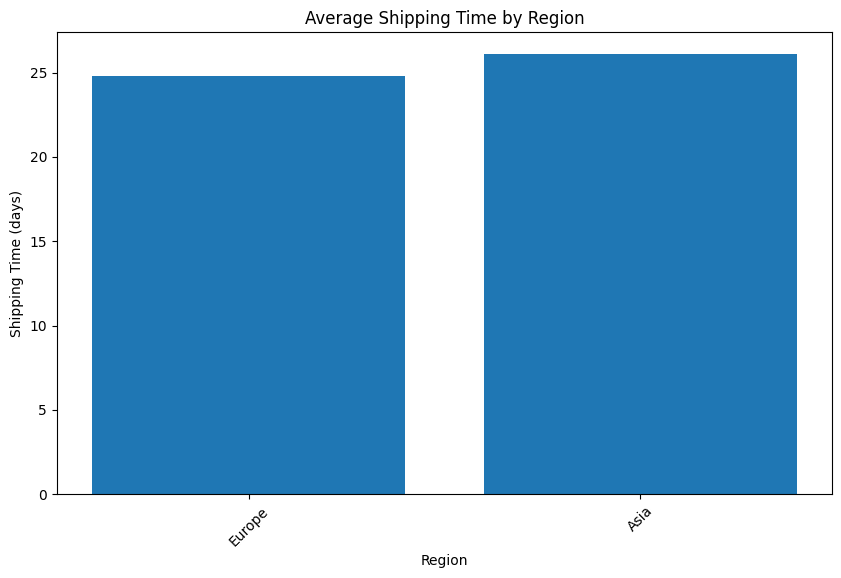

In [36]:
plt.figure(figsize=(10,6))
plt.bar(shipping_by_region.index, shipping_by_region)
plt.xticks(rotation=45)
plt.title("Average Shipping Time by Region")
plt.xlabel("Region")
plt.ylabel("Shipping Time (days)")
plt.show()

In [37]:
events_clean['DayOfWeek'] = events_clean['Order Date'].dt.day_name()
events_clean[['Order Date', 'DayOfWeek']].head()

/tmp/ipython-input-2735433950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_clean['DayOfWeek'] = events_clean['Order Date'].dt.day_name()


,Order Date,DayOfWeek
0,2014-10-08,Wednesday
1,2016-08-11,Thursday
3,2017-05-13,Saturday
4,2012-08-11,Saturday
5,2015-03-15,Sunday


In [38]:
days_stats = events_clean.groupby('DayOfWeek').agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'})

In [40]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_stats = days_stats.loc[order]
days_stats

,Units Sold,Total Revenue,Profit,Orders
DayOfWeek,,,,
Monday,933677.0,2.591551e+08,72156995.30,185
Tuesday,833975.0,2.048675e+08,63512866.99,175
Wednesday,839870.0,2.448676e+08,67768122.43,182
Thursday,818022.0,2.032473e+08,60108355.32,158
Friday,787802.0,2.436208e+08,73323427.18,163
Saturday,970549.0,2.208222e+08,68743185.28,191
Sunday,987776.0,2.224033e+08,68096082.56,194


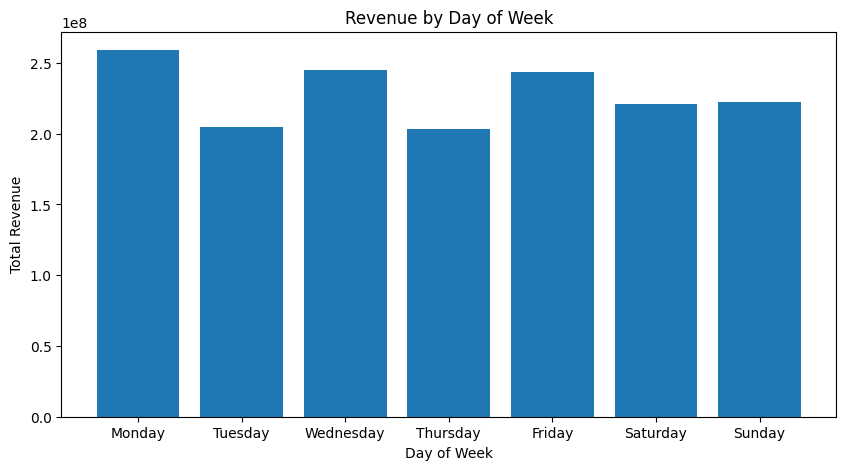

In [42]:
plt.figure(figsize=(10,5))
plt.bar(days_stats.index, days_stats['Total Revenue'])
plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.show()

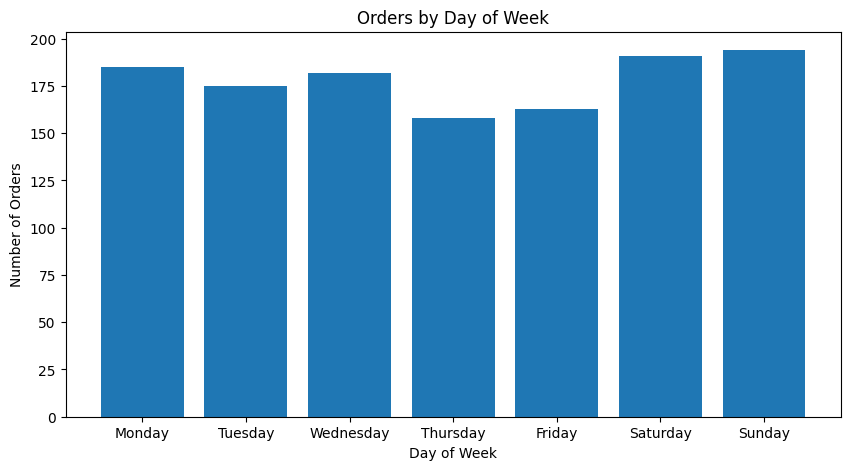

In [43]:
plt.figure(figsize=(10,5))
plt.bar(days_stats.index, days_stats['Orders'])
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.show()

# Final Report Summary

### Business Overview

The dataset contains multi-year global sales data from both online and offline channels. After cleaning missing country codes (≈6% of rows) and merging the three tables, the final dataset was used to evaluate key business metrics, product performance, regional trends, shipping efficiency, and weekly sales patterns.

## 1. Key Metrics

1. **Total orders**: ~1,250

2. **Countries covered**: ~200

3. **Product categories**: 12

4. The company generates **high revenue** and **strong positive profit** across all categories.


## 2. Product Performance

1. **Top revenue categories**: Office Supplies, Household, Cosmetics, Meat.

2. **Top profit categories**: Cosmetics, Office Supplies, Household.

3. **Lowest-performing categories**: Beverages, Fruits.

**Insight**: Core profitability is concentrated in office, household, and cosmetics products.

## 3. Geographic Analysis

1. **Regions**: Europe is the dominant market in both revenue and profit; Asia contributes significantly less.

2. **Countries**: Top performers include countries from Europe (e.g., Czech Republic, Ukraine).

**Insight**: The European market is the most valuable segment and should remain a strategic priority.

## 4. Sales Channels

1. Both **Online** and **Offline** channels perform strongly.

2. Offline slightly leads in profitability per order, while Online generates comparable total volume.

**Insight**: Balanced investments in both channels are recommended.


## 5. Shipping Time

1. Average shipping time varies significantly across regions and categories.

2. **Europe** has faster delivery, while **Asia and some smaller markets** experience longer delays.

**Insight**: Logistics optimization is possible in slower regions to improve customer experience.

## 6. Weekly Sales Patterns

1. Highest sales occur on **Monday** and **Wednesday**.

2. Sales dip on weekends (**Saturday–Sunday**).

**Insight**: Marketing and promotional activities should be focused earlier in the week.

##Conclusion

The company demonstrates strong global performance, driven mainly by European markets and high-margin product categories such as Office Supplies and Cosmetics. Sales channels are balanced, but logistics and low-performing categories present opportunities for improvement. Weekly sales patterns indicate that customer activity peaks mid-week, suggesting optimal timing for targeted marketing campaigns.